In [49]:
import numpy as np 
import pandas as pd

casos = list(range(1, 6, 1))
flags = [0, 1, 2, 3]
table = {'flags' : flags}

tempos = []
temposCasos = []

eficiencias = []
eficienciasCasos = []

speedups = []
speedupsCasos = []

# print(table)

for caso in casos:
    file = pd.read_csv(f'../../data/tempoFlagCaso{caso}.txt', header = 0, sep='\s+')
    
    for flag in flags:
        tempos.append(file['t'][flag])
    
    temposCasos.append(tempos)
    
    tempos = []


for caso in range(np.size(casos)):
    
    for flag in flags:
        eficiencias.append((1 - (temposCasos[caso][flag]/temposCasos[caso][0]))*100)
        speedups.append((temposCasos[caso][0]/temposCasos[caso][flag]))
        
    eficienciasCasos.append(eficiencias)
    speedupsCasos.append(speedups)
    
    eficiencias = []
    speedups = []
    
print(temposCasos)
print(eficienciasCasos)
print(speedupsCasos)
    

[[10983.01, 7396.46, 6296.7, 6153.15], [8943.01, 4198.3, 2986.27, 2695.16], [8612.01, 3692.3, 2741.27, 2597.16], [8242.01, 2941.3, 2874.27, 2698.16], [8421.01, 3162.3, 2641.27, 2603.16]]
[[0.0, 32.655437808032595, 42.66872196237643, 43.97574071224556], [0.0, 53.054955769925336, 66.60777523451277, 69.86294323723222], [0.0, 57.12615289578159, 68.1692194969583, 69.84258030355284], [0.0, 64.31331677588355, 65.12658926645321, 67.26332532962228], [0.0, 62.44749739045554, 68.63475996347232, 69.08731850454993]]
[[1.0, 1.4849008850179681, 1.7442485746502137, 1.7849410464558804], [1.0, 2.1301502989305194, 2.9947091187334034, 3.318174060167115], [1.0, 2.3324242342171546, 3.1416131938845866, 3.3159335581943354], [1.0, 2.8021657090402203, 2.8675141862107596, 3.054678002787085], [1.0, 2.6629383676438034, 3.1882427771488717, 3.2349183300296565]]


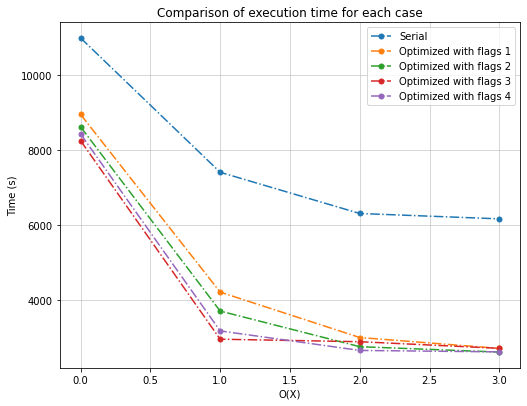

In [50]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(8,6))

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

for caso in range(np.size(casos)):
    if(caso == 0):
        labelPlot = 'Serial'
    else:
        labelPlot = f'Optimized with flags {caso}'
    
    axes.plot(flags, temposCasos[caso], ls='-.', marker='o',markersize=5, label=labelPlot)
    
axes.set_xlabel('O(X)')
axes.set_ylabel("Time (s)")

axes.set_title("Comparison of execution time for each case")

plt.grid(linestyle='-', linewidth=0.5)
axes.legend(loc='upper right')

plt.savefig("benchmarkSerialTempo.png", dpi=400)